In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

review = pd.read_csv('/content/drive/MyDrive/Kung Fu Pandas/TP2/train.csv')
review_t = pd.read_csv('/content/drive/MyDrive/Kung Fu Pandas/TP2/test.csv')
review_orig = review_t.copy()

review.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


In [ ]:
review['sentimiento'] = review['sentimiento'].map({'positivo':1,'negativo':0},na_action=None)
review.drop('ID', axis='columns', inplace=True)
review_t.drop('ID', axis='columns', inplace=True)

def metricas(y_pred,y_test):
  print(classification_report(y_test,y_pred))
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')



In [ ]:
target='sentimiento'
review_split=review.drop([target], axis='columns', inplace=False)
sentimientos = review[target].copy()
review_split.head()

,review_es
0,Uno de los otros críticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...
2,Pensé que esta era una manera maravillosa de p...
3,"Básicamente, hay una familia donde un niño peq..."
4,"El ""amor en el tiempo"" de Petter Mattei es una..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_split, sentimientos, test_size = 0.25, random_state = 5)

In [ ]:
n = 10
params_grid = {'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}

base_forest = RandomForestClassifier()
scorer_fn = make_scorer(f1_score)

randomcv = RandomizedSearchCV(estimator = base_forest, param_distributions = params_grid, scoring = scorer_fn, cv = 4, n_iter = n)
vectorizer = CountVectorizer();
X = vectorizer.fit_transform(X_train['review_es'])

randomcv.fit(X, y_train)


best_tree = randomcv.best_estimator_
print(randomcv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.8351340848353386


In [ ]:
random_forest = RandomForestClassifier().set_params(**randomcv.best_params_)
model1 = make_pipeline(CountVectorizer(), RandomForestClassifier().set_params(**randomcv.best_params_))
model1.fit(X_train['review_es'],y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_features='auto',
                                        min_samples_split=5,
                                        n_estimators=72))])

In [ ]:
predicted_categories_1 = model1.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6149
           1       0.85      0.85      0.85      6351

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



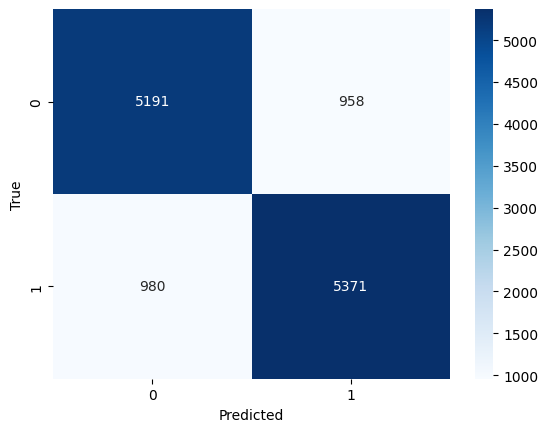

In [ ]:
predicted_categories_1 = model1.predict(X_test['review_es'])
metricas(predicted_categories_1, y_test)

In [ ]:
print(model1.get_params()['randomforestclassifier'].get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 72, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
y_predic = model1.predict(review_t['review_es'])
y_predic_cat = np.where(y_predic>0.5,1,0)

In [ ]:
review_orig['sentimiento'] = y_predic
review_orig['sentimiento'] = review_orig['sentimiento'].map({1:'positivo',0:'negativo'},na_action=None)
review_orig.head()

,ID,review_es,sentimiento
0,60000,La mayor virtud de esta película es su existen...,negativo
1,60001,"No soy un experto cinéfilo, pero pocas veces m...",negativo
2,60002,Si no eres un incondicional del humor estilo T...,negativo
3,60003,"No sé qué está pasando, si la gente se deja ll...",negativo
4,60004,"Pero cuando amanece,y me quedo solo,siento en ...",negativo


In [ ]:
entregable = pd.DataFrame({'ID': review_orig['ID'], 'sentimiento':review_orig['sentimiento']})

entregable.head()

,ID,sentimiento
0,60000,negativo
1,60001,negativo
2,60002,negativo
3,60003,negativo
4,60004,negativo


In [ ]:
entregable.to_csv('rf.csv', index=False)

In [20]:
import pickle
pickle.dump(random_forest, open("RF_model", "wb"))